In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense (128, activation='relu'), keras.layers.Dense (10, activation='softmax') ])


In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4957 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8835
Test accuracy: 0.8834999799728394


In [8]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 0s 1ms/step


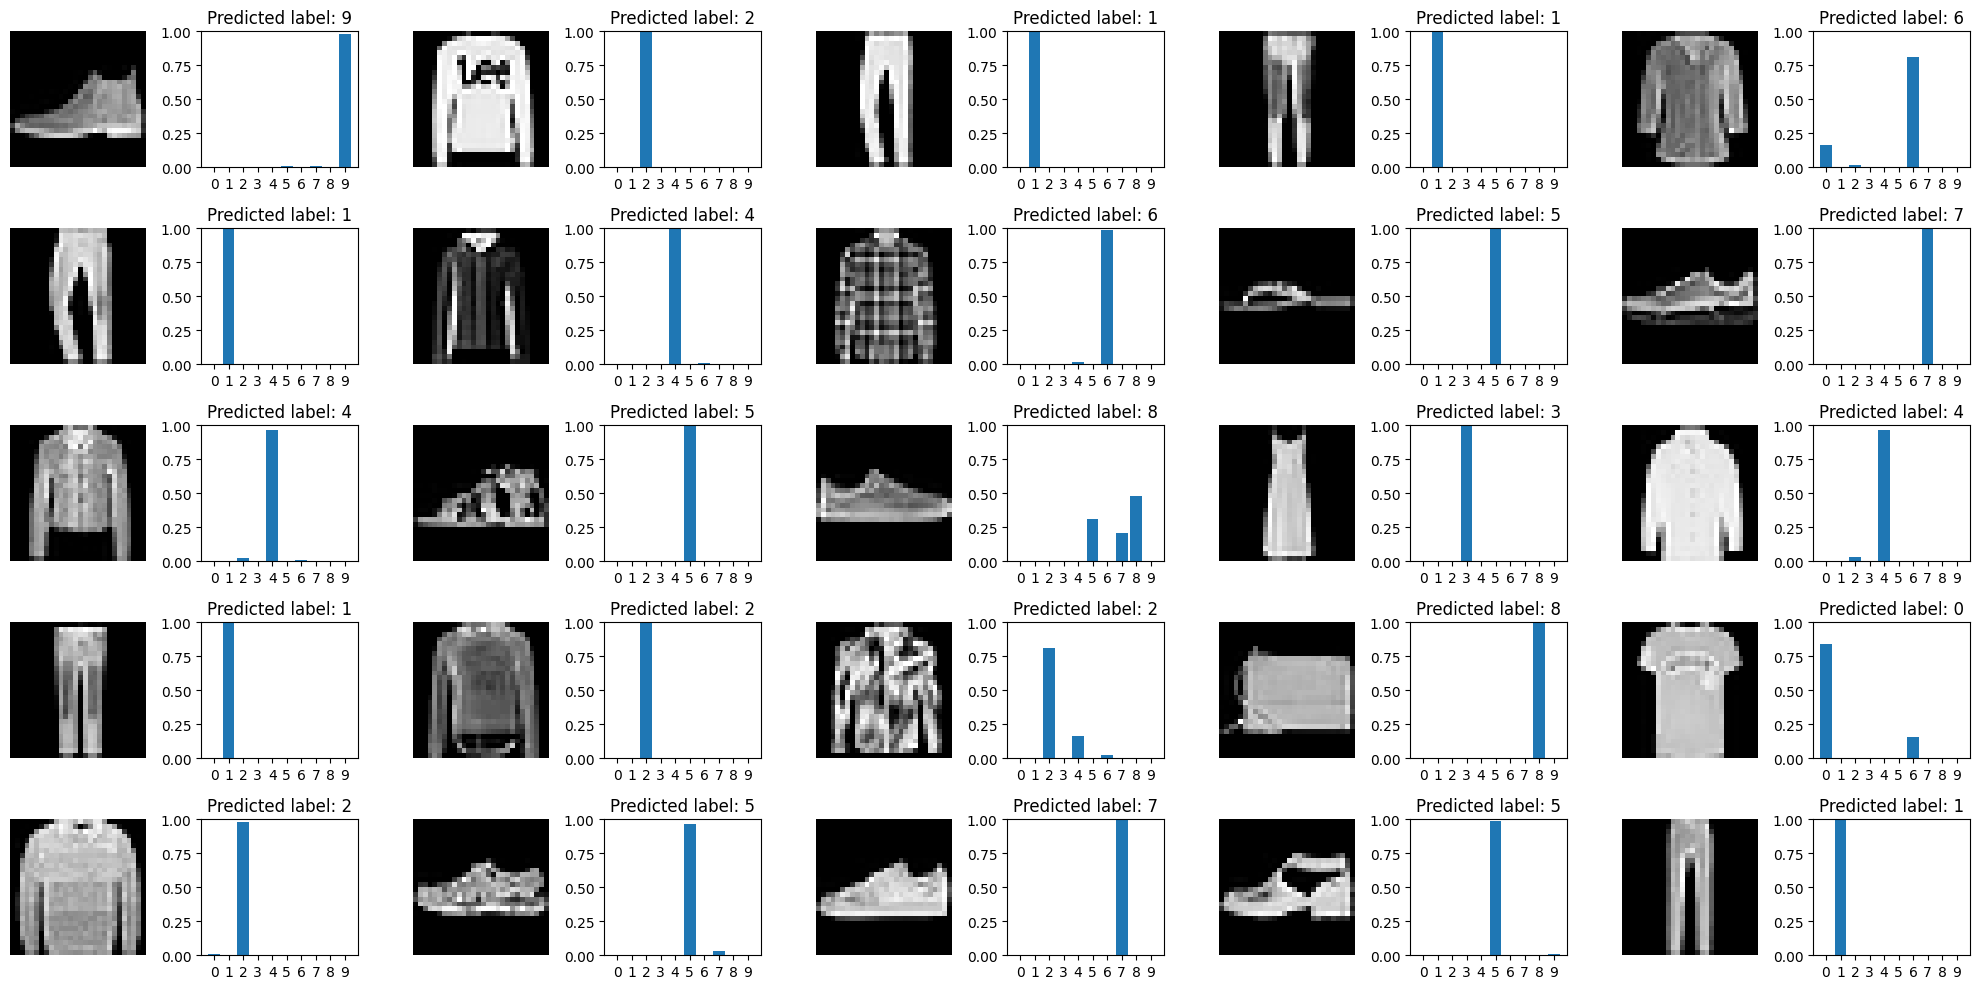

In [9]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) 
  plt.imshow(test_images[i], cmap='gray')
  plt.axis('off')
  plt.subplot(num_rows, 2 * num_cols, 2* i + 2)
  plt.bar(range(10), predictions[i])
  plt.xticks(range(10)) 
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.title(f"Predicted label: {predicted_labels[i]}")
plt.show()